# Decision trees #

During the course, the scikit-learn (sklearn) package will be used to build decision trees based on data, test the trees and use them for classification. 

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris = load_iris()  #read an example dataset

Creating a tree object.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [3]:
mytree1 = tree.DecisionTreeClassifier()

Training a decision tree classifier on the basis of training data.

In [4]:
mytree1.fit(iris.data, iris.target)

DecisionTreeClassifier()

It is possible to read the configuration parameters of the tree using  the `get_params` method.

In [5]:
mytree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Classifying an example feature vector.

In [6]:
result_class = mytree1.predict([[2,3,4,5]])
print(iris.target_names[result_class])

['virginica']


It is also possible to get the class probablities for a given example. 

In [7]:
mytree1.predict_proba([[2,3,4,5]])

array([[0., 0., 1.]])

# Tree structure 

Function `plot_tree` lets draw the trained tree.

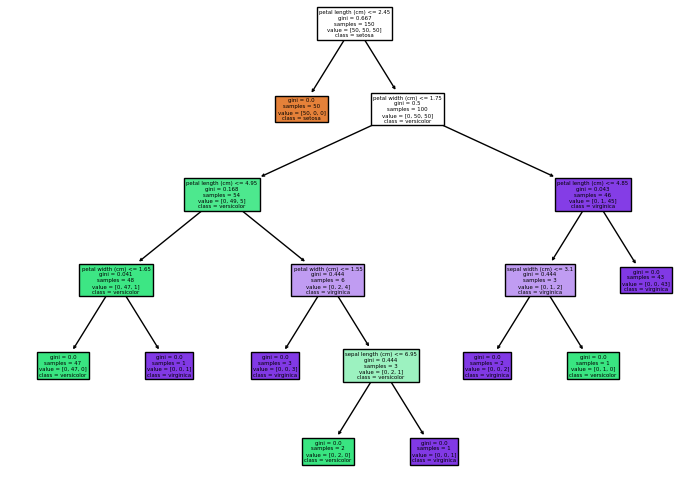

In [8]:
tree.plot_tree(mytree1,filled=True, feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()

The tree structure is saved in the `tree_` attribute. You may find information on the number of nodes there and tables containing:

* for each internal node: the indices if the left and the right descendant nodes, the index of the attribute selected for the decision rule in that node and a threshold value for that attribute,

* for each leaf: irrelevant values.

Analyze the structure of your tree (`mytree1`).

In [9]:
print("Liczba wezlow: ", mytree1.tree_.node_count)
print("Indeksy lewych potomkow:", mytree1.tree_.children_left)
print("Indeksy prawych potomkow:",mytree1.tree_.children_right)
print("Wybrane atrybuty:", mytree1.tree_.feature)
print("Wartosci progowe:", mytree1.tree_.threshold)

Liczba wezlow:  17
Indeksy lewych potomkow: [ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
Indeksy prawych potomkow: [ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]
Wybrane atrybuty: [ 2 -2  3  2  3 -2 -2  3 -2  0 -2 -2  2  1 -2 -2 -2]
Wartosci progowe: [ 2.44999999 -2.          1.75        4.95000005  1.65000004 -2.
 -2.          1.55000001 -2.          6.94999981 -2.         -2.
  4.85000014  3.10000002 -2.         -2.         -2.        ]


**Excercise 1: (1 pt)**

Using the information about the tree structure contained in the attribute `tree_`, list the indices of all leaves of the constructed tree. 

In [10]:
leaf_indexes = []
for index, left_child in enumerate(mytree1.tree_.children_left):
    if left_child == -1:
        leaf_indexes.append(index)

print(f"Leaf indexes recovered using tree_.children_left attribute: {leaf_indexes}")
leaf_indexes.clear()

for index, right_child in enumerate(mytree1.tree_.children_right):
    if right_child == -1:
        leaf_indexes.append(index)
print(f"Leaf indexes recovered using tree_.children_right attribute: {leaf_indexes}")

Leaf indexes recovered using tree_.children_left attribute: [1, 5, 6, 8, 10, 11, 14, 15, 16]
Leaf indexes recovered using tree_.children_right attribute: [1, 5, 6, 8, 10, 11, 14, 15, 16]


# Testing a decision tree

**On the basis of a separate set of data** 

The data set is divided into training and testing data (`train_test_split`). The `score` method returns the classification accuracy. Using the `confusion_matrix` function you can find out exactly what the classification results are depending on the class. This function returns the a matrix whose element (i, j) contains the number of examples of the i-th class classified to the j-th class. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #, accuracy_score
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
mytree1.fit(data_train, target_train)
print(mytree1.score(data_test,target_test), " of the examples have been correctly classified.")
confusion_matrix(target_test, mytree1.predict(data_test))

0.95  of the examples have been correctly classified.


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]], dtype=int64)

**During the cross-validation procedure** 

The data set is divided into k subsets. Training and testing is repeated k times. In each iteration, 1 of the k subsets is used for testing and all others for training (k-fold cross-validation). The results are averaged (`cross_val_score`). 

In [12]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(mytree1, iris.data, iris.target, cv=5)

We obtain the test results from individual validation runs as well as the averaged result with the 95% confidence interval. The real result is in this range with a probability of 0.95. 

In [13]:
print("Classification accuracy for individual validation runs: ", results)
print("Averaged classification accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

Classification accuracy for individual validation runs:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Averaged classification accuracy: 0.96 (+/- 0.07)


As a result of cross-validation, each example is included in the test set once. The prediction results for individual examples can be read using the `cross_val_predict` function. This function, like `cross_val_score`, does cross validation, but returns the results of classifying individual examples instead of the accuracy obtained in subsequent iterations. 

In [14]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(mytree1, iris.data, iris.target, cv=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Excercise 2 (1 pt):**

Provide the number and the indices of examples that were misclassified during the 10-fold cross-validation. 

In [15]:
predicted_classes = cross_val_predict(mytree1, iris.data, iris.target, cv = 10)
wrongly_classified_entries_indices = []
for i in range(len(predicted_classes)):
    if predicted_classes[i] != iris.target[i]:
        wrongly_classified_entries_indices.append(i)

print(wrongly_classified_entries_indices)

[70, 77, 83, 106, 119, 129]


**Excercise 3 (0.5 pt):**

Perform 10-fold cross-validation to test two trees differing in the attribute selection criterion used: information gain (`criterion = 'entropy'`) or Gini index (`criterion ='gini'`). Compare the quality of the classification in both cases. 

In [16]:
entropy_tree = tree.DecisionTreeClassifier(criterion='entropy')
gini_tree = tree.DecisionTreeClassifier(criterion='gini')

entropy_score = cross_val_score(entropy_tree, iris.data, iris.target, cv=10)
gini_score = cross_val_score(gini_tree, iris.data, iris.target, cv=10)

print(f"Classification accuracy for entropy criterion trained tree {entropy_score}")
print(f"Accuracy of entropy criterion prediction: {entropy_score.mean() * 100}% +/- {entropy_score.std()*2}")

print(f"Classification accuracy for gini criterion trained tree {gini_score}")
print(f"Accuracy of  gini criterion prediction: {gini_score.mean() * 100}% +/- {gini_score.std()*2}")

Classification accuracy for entropy criterion trained tree [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Accuracy of entropy criterion prediction: 96.0% +/- 0.08844332774281065
Classification accuracy for gini criterion trained tree [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Accuracy of  gini criterion prediction: 95.33333333333334% +/- 0.08537498983243796


# Limiting the size of the tree - stopping criterion

We can limit the size of the tree by setting the value of one of the following parameters:

`min_samples_split` - the minimum number of examples required to continue splitting data in the node

`min_samples_leaf` - the minimum number of examples allowed in a leaf

`max_leaf_nodes` - the maximum number of leaves

`max_depth` - the maximum depth of the tree 

**Excercise 4 (0.5 pt):**

View the description of `digits` dataset:

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Load this data set using the `load_digits()` function. 

For digits data train `mytree1` tree so that the minimum number of examples per leaf is 4. Then train `mytree2` tree so that it does not have more than 5 leaves. Compare the classification accuracy of both trees for the training set and for a separate test set.

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
train_digit_data, test_digit_data, train_digit_target, test_digit_target = train_test_split(digits['data'], digits['target'], test_size=0.2)
mytree1 = tree.DecisionTreeClassifier(min_samples_leaf=4).fit(train_digit_data, train_digit_target)
mytree2 = tree.DecisionTreeClassifier(max_leaf_nodes=5).fit(train_digit_data, train_digit_target)

print(f"Accuracy for the tree with min. 4 samples per leaf: {mytree1.score(test_digit_data, test_digit_target)*100}%")
print(f"Accuracy for the tree with max. 5 leaf nodes: {mytree2.score(test_digit_data, test_digit_target)*100}%")

Accuracy for the tree with min. 4 samples per leaf: 82.22222222222221%
Accuracy for the tree with max. 5 leaf nodes: 42.22222222222222%


**Excercise 5 (1.5 pt):**

Adjust the optimal value of the `max_leaf_nodes` coefficient for the `digits` data set. To do this, divide the `digits` set into two parts. Using the first subset, perform cross-validation multiple times for different values of the optimized parameter. Identify the optimal value, i.e. the one for which the mean error is the lowest (estimated in the cross-validation process). After finding the optimal value, train the tree for the found number of `max_leaf_nodes`. This time, use the entire first subset of data for training. Then test the constructed tree on the data from the second subset. Compare the obtained results with the results obtained before the optimization of the `max_leaf_nodes` parameter. 

The results of the whole procedure (not only the final ones) should be displayed.


In [18]:
train_digit_data, test_digit_data, train_digit_target, test_digit_target = train_test_split(digits['data'], digits['target'], test_size=0.2)
max_leaf_nodes_values = range(2, 200)
precision_values = []
best_max_leaf_nodes_value = 0
best_precision = 0
digit_tree = None
for max_leaf_nodes_count in max_leaf_nodes_values:
    digit_tree = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes_count)
    score = cross_val_score(digit_tree, train_digit_data, train_digit_target, cv=10)
    average_precision = score.mean()
    precision_values.append(average_precision)
    if average_precision > best_precision:
        best_precision = average_precision
        best_max_leaf_nodes_value = max_leaf_nodes_count
    print(f"For max leaf node count of {max_leaf_nodes_count}, average precision during CV is {average_precision*100}%.")

print(f"\nThe best precision of {best_precision*100}% has been achieved for max leaf node count of {best_max_leaf_nodes_value}")


For max leaf node count of 2, average precision during CV is 19.69551282051282%.
For max leaf node count of 3, average precision during CV is 27.559246309246312%.
For max leaf node count of 4, average precision during CV is 35.562354312354316%.
For max leaf node count of 5, average precision during CV is 42.52185314685315%.
For max leaf node count of 6, average precision during CV is 48.8548951048951%.
For max leaf node count of 7, average precision during CV is 53.86509324009323%.
For max leaf node count of 8, average precision during CV is 57.692793317793324%.
For max leaf node count of 9, average precision during CV is 62.07799145299144%.
For max leaf node count of 10, average precision during CV is 64.16423853923854%.
For max leaf node count of 11, average precision during CV is 67.3683954933955%.
For max leaf node count of 12, average precision during CV is 71.12859362859363%.
For max leaf node count of 13, average precision during CV is 72.79671717171719%.
For max leaf node count

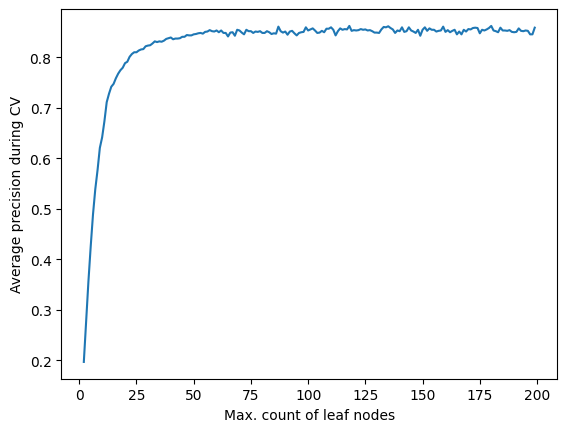

In [19]:
#Plotting the results of the experiment with maximal leaf count
plt.plot(max_leaf_nodes_values, precision_values)
plt.xlabel('Max. count of leaf nodes')
plt.ylabel('Average precision during CV')
plt.show()

In [20]:
digit_tree = tree.DecisionTreeClassifier().fit(train_digit_data, train_digit_target)
print(f"Average precision of tree without optimizing the max. leaf node count parameter: {digit_tree.score(test_digit_data, test_digit_target) * 100}%")

digit_tree = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes_value).fit(train_digit_data, train_digit_target)
print(f"Average precision of tree with optimizing the max. leaf node count parameter: {digit_tree.score(test_digit_data, test_digit_target) * 100}%")


Average precision of tree without optimizing the max. leaf node count parameter: 85.27777777777777%
Average precision of tree with optimizing the max. leaf node count parameter: 84.72222222222221%


**Excercise 6 (1.5 pt):**

Split the `digits` dataset into training and testing in a 2:1 ratio. Repeat training and testing many times using an increasing value of the `max_leaf_nodes` parameter. Draw a graph showing the dependence of the classification error on the size of the tree. Show this relationship on a single plot both for testing and training data. 

Classification error for a tree with 2 max leaf nodes is equal to 77.29549248747914%
Classification error for a tree with 3 max leaf nodes is equal to 68.9482470784641%
Classification error for a tree with 4 max leaf nodes is equal to 60.76794657762938%
Classification error for a tree with 5 max leaf nodes is equal to 54.090150250417366%
Classification error for a tree with 6 max leaf nodes is equal to 48.58096828046744%
Classification error for a tree with 7 max leaf nodes is equal to 42.23706176961603%
Classification error for a tree with 8 max leaf nodes is equal to 35.89315525876461%
Classification error for a tree with 9 max leaf nodes is equal to 33.2220367278798%
Classification error for a tree with 10 max leaf nodes is equal to 28.881469115191983%
Classification error for a tree with 11 max leaf nodes is equal to 25.542570951585976%
Classification error for a tree with 12 max leaf nodes is equal to 24.540901502504177%
Classification error for a tree with 13 max leaf nodes is eq

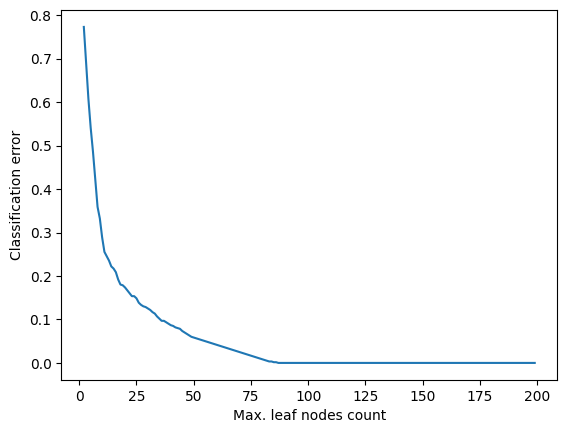

In [21]:
train_digit_data, test_digit_data, train_digit_target, test_digit_target = train_test_split(digits['data'], digits['target'], test_size=(1./3.))

digit_tree = None
classification_errors = []
for max_leaf_nodes_count in max_leaf_nodes_values:
    digit_tree = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes_count).fit(test_digit_data, test_digit_target)
    classification_error = 1 - digit_tree.score(test_digit_data, test_digit_target)
    classification_errors.append(classification_error)
    print(f"Classification error for a tree with {max_leaf_nodes_count} max leaf nodes is equal to {classification_error * 100}%")

plt.plot(max_leaf_nodes_values, classification_errors)
plt.xlabel('Max. leaf nodes count')
plt.ylabel('Classification error')
plt.show()
    

# Random forests #

Se the description of `RandomForestClassifier` class:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
from sklearn.ensemble import RandomForestClassifier

**Excercise 7 (1.5 pt)**

For the digits dataset, construct a random forest of 20 trees.

a) What is the classification error for the training set?

b) What is the classification error estimated in the cross-validation process?

c) Which digit (class) shows the highest calssification accuracy and which one shows the lowest accuracy?

d) What is the most common mistake (which number is confused the most often)? 

In [24]:
digits_forest = RandomForestClassifier(n_estimators=20).fit(train_digit_data, train_digit_target)

print(f"a) Classification error for training set: {(1 - digits_forest.score(test_digit_data, test_digit_target)) * 100}%")
print(f"b) Classification error estimated in the cross validation process {(1- cross_val_score(digits_forest, digits['data'], digits['target']).mean()) * 100}%")

digit_confusion_matrix = confusion_matrix(test_digit_target, digits_forest.predict(test_digit_data))
digit_accuracies = {}
for i in range(len(digit_confusion_matrix)):
    digit_overall = digit_confusion_matrix[i].sum()
    correctly_classified_digits = digit_confusion_matrix[i][i]
    digit_accuracies[i] = correctly_classified_digits/digit_overall

print(f"Accuracies for each digit: {digit_accuracies}")

a) Classification error for training set: 4.841402337228717%
b) Classification error estimated in the cross validation process 7.566233364283514%
Accuracies for each digit: {0: 1.0, 1: 1.0, 2: 0.9076923076923077, 3: 0.9047619047619048, 4: 0.9661016949152542, 5: 1.0, 6: 0.9577464788732394, 7: 1.0, 8: 0.8970588235294118, 9: 0.9056603773584906}


**Excercise 8 (1 pt)**

For each class, provide the classification accuracy, i.e. the ratio of correctly classified examples of a given class to all examples of that class. It is one of the classifier quality parameters and it is called recall. You can use the `recall_score` function or determine the appropriate values yourself using the confusion matrix. Find the recall values in two ways. 

In [25]:
from sklearn.metrics import recall_score
predictions = digits_forest.predict(test_digit_data)
recall_from_func = recall_score(test_digit_target, predictions, labels=range(10), average = None)


digit_confusion_matrix = confusion_matrix(test_digit_target, predictions)
recall_from_hand = []
for i in range(len(digit_confusion_matrix)):
    recall_from_hand.append(digit_confusion_matrix[i][i]/digit_confusion_matrix[i].sum())

for i in range(10):
    print(f"Recall for digit {i} - By sklearn function: {recall_from_func[i]} - By manual calculation {recall_from_hand[i]}")
    

Recall for digit 0 - By sklearn function: 1.0 - By manual calculation 1.0
Recall for digit 1 - By sklearn function: 1.0 - By manual calculation 1.0
Recall for digit 2 - By sklearn function: 0.9076923076923077 - By manual calculation 0.9076923076923077
Recall for digit 3 - By sklearn function: 0.9047619047619048 - By manual calculation 0.9047619047619048
Recall for digit 4 - By sklearn function: 0.9661016949152542 - By manual calculation 0.9661016949152542
Recall for digit 5 - By sklearn function: 1.0 - By manual calculation 1.0
Recall for digit 6 - By sklearn function: 0.9577464788732394 - By manual calculation 0.9577464788732394
Recall for digit 7 - By sklearn function: 1.0 - By manual calculation 1.0
Recall for digit 8 - By sklearn function: 0.8970588235294118 - By manual calculation 0.8970588235294118
Recall for digit 9 - By sklearn function: 0.9056603773584906 - By manual calculation 0.9056603773584906


**Excercise 9 (1.5 pt)**

Plot a graph showing the dependence of the random forest classification error on the number of trees in the forest. Estimate the classification error in the 5-fold cross-validation. 

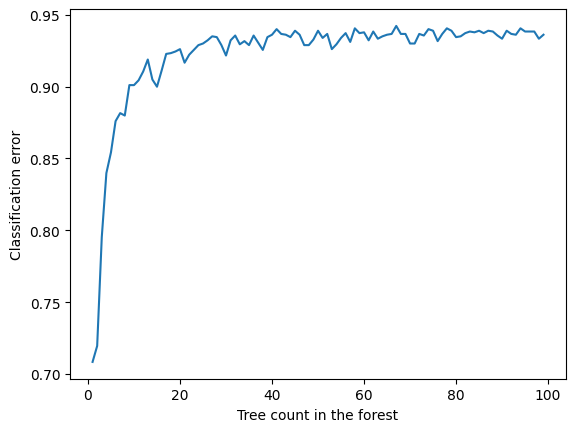

In [26]:
forest_counts = range(1, 100)

classification_errors = []
for forest_count in forest_counts:  
    classification_errors.append(cross_val_score(RandomForestClassifier(n_estimators=forest_count), digits['data'], digits['target'], cv=5).mean())


plt.plot(forest_counts, classification_errors)
plt.xlabel('Tree count in the forest')
plt.ylabel('Classification error')
plt.show()
